In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as stats

%matplotlib inline

In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [294]:
trdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing/train.csv')
testdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing/test.csv')

In [139]:
trdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [ ]:
trdf.isnull().sum()/len(trdf) #but this is hard to read

In [ ]:
null_counts = trdf.isnull().sum()/len(trdf)
null_counts[null_counts > 0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [ ]:
n = null_counts[null_counts > 0]

In [ ]:
n.sort_values(ascending = [False])

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [295]:
#Remove those columns with greater than 20% missing data
trdf = trdf.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis = 1)


In [296]:
#have to do the same for test df
testdf = testdf.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis = 1)

In [ ]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


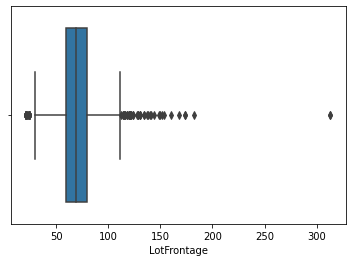

In [ ]:
sns.boxplot(trdf.LotFrontage)

In [297]:
trdf['LotFrontage'] = trdf['LotFrontage'].fillna(trdf['LotFrontage'].median())

In [298]:
testdf['LotFrontage'] = testdf['LotFrontage'].fillna(testdf['LotFrontage'].median())

In [299]:
null_counts = trdf.isnull().sum()/len(trdf)
null_counts[null_counts > 0]
n = null_counts[null_counts > 0]
n.sort_values(ascending = [False])

GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [300]:
trnlist = trdf.columns[trdf.isnull().any()].tolist()
trnlist

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [301]:
null_counts2 = testdf.isnull().sum()/len(testdf)
null_counts2[null_counts2 > 0]
n2 = null_counts2[null_counts2 > 0]
n2.sort_values(ascending = [False])

GarageFinish    0.053461
GarageCond      0.053461
GarageQual      0.053461
GarageYrBlt     0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
Utilities       0.001371
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
Functional      0.001371
GarageCars      0.000685
GarageArea      0.000685
BsmtUnfSF       0.000685
KitchenQual     0.000685
TotalBsmtSF     0.000685
BsmtFinSF2      0.000685
BsmtFinSF1      0.000685
Exterior2nd     0.000685
Exterior1st     0.000685
SaleType        0.000685
dtype: float64

In [302]:
testnlist = testdf.columns[testdf.isnull().any()].tolist()
testnlist

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [303]:
todrop = trnlist + testnlist
todrop

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [304]:
trdf = trdf.dropna(subset = todrop)

In [ ]:
#testdf = testdf.dropna(subset = todrop) cannot drop anything in test set

In [305]:
trdf.shape

(1338, 76)

In [306]:
testdf.shape

(1459, 75)

In [307]:
null_counts = trdf.isnull().sum()/len(trdf)
null_counts[null_counts > 0]
n = null_counts[null_counts > 0]
n.sort_values(ascending = [False])

Series([], dtype: float64)

In [308]:
trdfnum = trdf.select_dtypes(['int','float'])
trdfnum = trdfnum.drop(['SalePrice'], axis = 1)

In [309]:
trdfnum.skew(axis = 0)


Id                0.000844
MSSubClass        1.391901
LotFrontage       2.502469
LotArea          11.938124
OverallQual       0.315218
OverallCond       0.897541
YearBuilt        -0.677966
YearRemodAdd     -0.563345
MasVnrArea        2.582685
BsmtFinSF1        1.693397
BsmtFinSF2        4.146519
BsmtUnfSF         0.935363
TotalBsmtSF       2.214029
1stFlrSF          1.397431
2ndFlrSF          0.769147
LowQualFinSF     10.566815
GrLivArea         1.430307
BsmtFullBath      0.459865
BsmtHalfBath      3.847909
FullBath         -0.014175
HalfBath          0.554013
BedroomAbvGr     -0.058165
KitchenAbvGr      5.943561
TotRmsAbvGrd      0.673364
Fireplaces        0.570838
GarageYrBlt      -0.669457
GarageCars        0.200432
GarageArea        0.807078
WoodDeckSF        1.481740
OpenPorchSF       2.250952
EnclosedPorch     3.205286
3SsnPorch        10.096553
ScreenPorch       3.916848
PoolArea         14.187832
MiscVal          24.632578
MoSold            0.205257
YrSold            0.109344
d

In [310]:
skewtrlist = trdfnum.columns[trdfnum.skew(axis = 0)>0.5].tolist() #only take the high skew(0.5)
skewtrlist

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [311]:
#treat skew in training set
for i in trdfnum:
  if i in skewtrlist:
    trdfnum[i] = np.log1p(trdfnum[i])

In [312]:
testdfnum = testdf.select_dtypes(['int','float'])

In [313]:
skewtestlist = testdfnum.columns[testdfnum.skew(axis = 0)>0.5].tolist() #only take the high skew(0.5)
skewtestlist

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [314]:
#treat skew in test set
for i in testdfnum:
  if i in skewtestlist:
    testdfnum[i] = np.log1p(testdfnum[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [315]:
trdfnum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   float64
 2   LotFrontage    1338 non-null   float64
 3   LotArea        1338 non-null   float64
 4   OverallQual    1338 non-null   int64  
 5   OverallCond    1338 non-null   float64
 6   YearBuilt      1338 non-null   int64  
 7   YearRemodAdd   1338 non-null   int64  
 8   MasVnrArea     1338 non-null   float64
 9   BsmtFinSF1     1338 non-null   float64
 10  BsmtFinSF2     1338 non-null   float64
 11  BsmtUnfSF      1338 non-null   float64
 12  TotalBsmtSF    1338 non-null   float64
 13  1stFlrSF       1338 non-null   float64
 14  2ndFlrSF       1338 non-null   float64
 15  LowQualFinSF   1338 non-null   float64
 16  GrLivArea      1338 non-null   float64
 17  BsmtFullBath   1338 non-null   int64  
 18  BsmtHalf

In [316]:
testdfnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   float64
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1444 non-null   float64
 9   BsmtFinSF1     1458 non-null   float64
 10  BsmtFinSF2     1458 non-null   float64
 11  BsmtUnfSF      1458 non-null   float64
 12  TotalBsmtSF    1458 non-null   float64
 13  1stFlrSF       1459 non-null   float64
 14  2ndFlrSF       1459 non-null   float64
 15  LowQualFinSF   1459 non-null   float64
 16  GrLivArea      1459 non-null   float64
 17  BsmtFullBath   1457 non-null   float64
 18  BsmtHalf

In [317]:
trdfstr = trdf.select_dtypes(include = ['object'])

In [318]:
testdfstr = testdf.select_dtypes(include = ['object'])

In [ ]:
trdfstr.info()

In [ ]:
trdfstr['MSZoning'].value_counts().index

Index(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype='object')

In [ ]:
#let's run a loop to check all str values and there are no unusual values
for i in trdfstr:
  print([i], trdfstr[i].value_counts().index)

['MSZoning'] Index(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype='object')
['Street'] Index(['Pave', 'Grvl'], dtype='object')
['LotShape'] Index(['Reg', 'IR1', 'IR2', 'IR3'], dtype='object')
['LandContour'] Index(['Lvl', 'Bnk', 'HLS', 'Low'], dtype='object')
['Utilities'] Index(['AllPub', 'NoSeWa'], dtype='object')
['LotConfig'] Index(['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], dtype='object')
['LandSlope'] Index(['Gtl', 'Mod', 'Sev'], dtype='object')
['Neighborhood'] Index(['NAmes', 'CollgCr', 'OldTown', 'Somerst', 'Gilbert', 'NridgHt',
       'NWAmes', 'Edwards', 'Sawyer', 'SawyerW', 'Crawfor', 'BrkSide',
       'Mitchel', 'NoRidge', 'Timber', 'IDOTRR', 'ClearCr', 'StoneBr', 'SWISU',
       'Blmngtn', 'BrDale', 'MeadowV', 'Veenker', 'NPkVill', 'Blueste'],
      dtype='object')
['Condition1'] Index(['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn',
       'RRNe'],
      dtype='object')
['Condition2'] Index(['Norm', 'Feedr', 'Artery', 'RRNn', 'PosN', 'PosA', 'RRAn', 'R

In [319]:
encoding_trdf = trdfstr #need to be in array form or it will not be encoded if left as a list
encoded_trdf = pd.get_dummies(data = encoding_trdf)
encoded_trdf.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [320]:
encoding_testdf = testdfstr #need to be in array form or it will not be encoded if left as a list
encoded_testdf = pd.get_dummies(data = encoding_testdf)
encoded_testdf.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0

In [322]:
combined_trdf = pd.concat([encoded_trdf, trdfnum], axis=1, join = 'outer')
combined_trdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Columns: 266 entries, MSZoning_C (all) to YrSold
dtypes: float64(27), int64(10), uint8(229)
memory usage: 696.4 KB


In [324]:
combined_testdf = pd.concat([encoded_testdf, testdfnum], axis=1, join = 'outer')
combined_testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 255 entries, MSZoning_C (all) to YrSold
dtypes: float64(28), int64(9), uint8(218)
memory usage: 732.5 KB


In [325]:
combined_testdf.shape

(1459, 255)

In [263]:
forsubmission = combined_testdf

In [326]:
combined_trdf.shape

(1338, 266)

In [ ]:
#we need to make them the same shape

In [327]:
combined_trdf.columns.difference(combined_testdf.columns).tolist()

['Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'GarageQual_Ex',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Utilities_NoSeWa']

In [328]:
todrop2 = combined_trdf.columns.difference(combined_testdf.columns).tolist()

In [329]:
todrop2

['Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'GarageQual_Ex',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Utilities_NoSeWa']

In [330]:
combined_trdf = combined_trdf.drop(todrop2, axis = 1)

In [331]:
#check again
combined_trdf.columns.difference(combined_testdf.columns).tolist()

[]

In [332]:
combined_trdf.shape

(1338, 251)

In [333]:
combined_testdf.shape

(1459, 255)

In [334]:
#check again
combined_testdf.columns.difference(combined_trdf.columns).tolist()

['ExterCond_Po', 'Exterior1st_AsphShn', 'Foundation_Slab', 'Heating_Wall']

In [335]:
combined_testdf = combined_testdf.drop(['ExterCond_Po', 'Exterior1st_AsphShn', 'Foundation_Slab', 'Heating_Wall'], axis = 1)

In [336]:
combined_testdf.shape

(1459, 251)

In [337]:
null_counts = combined_testdf.isnull().sum()/len(combined_testdf)
null_counts[null_counts > 0]
n = null_counts[null_counts > 0]
n.sort_values(ascending = [False])

GarageYrBlt     0.053461
MasVnrArea      0.010281
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
BsmtFinSF1      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
GarageCars      0.000685
GarageArea      0.000685
dtype: float64

In [338]:
combined_testdf = combined_testdf.fillna(combined_testdf.median(axis=0)) #fill nulls with median

In [339]:
null_counts = combined_testdf.isnull().sum()/len(combined_testdf)
null_counts[null_counts > 0]
n = null_counts[null_counts > 0]
n.sort_values(ascending = [False])

Series([], dtype: float64)

In [340]:
from sklearn.model_selection import train_test_split 
label = np.array(trdf['SalePrice'])
X_train, X_test, Y_train,Y_test = train_test_split(combined_trdf, label, test_size=0.3) #standard 70train-30test

REGRESSION TREE **MODEL** 

In [341]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [342]:
y_pred = regressor.predict(X_test)

In [343]:
combined_trdf.shape #245 columns/variables

(1338, 251)

In [344]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
Y_pred = regressor.predict(X_test) 
print_metrics(Y_test, Y_pred, 250) #why 265? cos of R2adj formula (number of variables -1 in this case is 266 so -1 =265)    
#the higher the R2 the better the model, under the hood R2 is comparing the prediction against the base model (which is random guessing)

Mean Square Error      = 1900837437.3955224
Root Mean Square Error = 43598.59444288912
Mean Absolute Error    = 28314.883084577115
Median Absolute Error  = 18430.5
R^2                    = 0.7174223824265247
Adjusted R^2           = 0.25451562732260785


In [345]:
from sklearn.metrics import r2_score
# Defining the adjusted R² function
def adjusted_r2_score(actual, predictions, num_pred, num_samples):
    n = num_samples
    k = num_pred
    r2 = r2_score(actual, predictions)
    adjusted_r2 = 1 - ((1-r2) * ((n-1)/(n-k-1)))
    return adjusted_r2
Y_pred = regressor.predict(X_test) 
num_samples = X_test.shape[0]
num_predictors = X_test.shape[1]
adjusted_r2_score(Y_test, Y_pred, num_predictors, num_samples)

0.24457583568690933

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


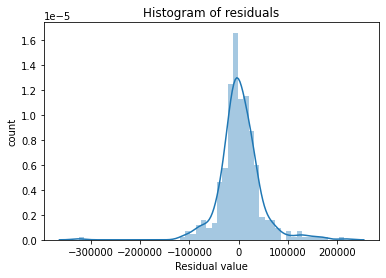

In [346]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1)) #reshape both scores to between -1 to 1 so that can subtract
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(Y_test, Y_pred) 

Text(0, 0.5, 'Residual')

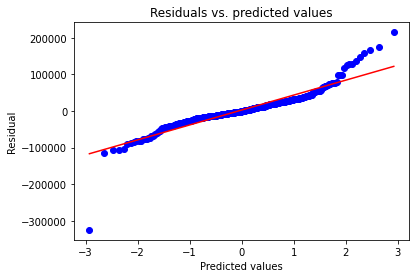

In [347]:
import scipy.stats as sci
resids = np.subtract(Y_test, Y_pred)
sci.probplot(resids,plot=plt)
plt.title('Residuals vs. predicted values')
plt.xlabel('Predicted values')
plt.ylabel('Residual')

In [348]:
from sklearn import metrics
print("MSE for DTReg (All features): " , np.round(metrics.mean_squared_error(Y_test, Y_pred), 2))

print("MAE for DTReg (All features): " , np.round(metrics.mean_absolute_error(Y_test, Y_pred), 2))

print("RSquared for DTReg (All features): " , np.round(metrics.r2_score(Y_test, Y_pred), 2))



MSE for DTReg (All features):  1900837437.4
MAE for DTReg (All features):  28314.88
RSquared for DTReg (All features):  0.72


## **PCA**


Standardize the Data
The text in this paragraph is almost an exact copy of what was written earlier. PCA is effected by scale so you need to scale the features in the data before applying PCA. You can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. StandardScaler helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

In [357]:
X_train.shape

(936, 251)

In [358]:
X_test.shape

(402, 251)

In [359]:
combined_testdf.shape

(1459, 251)

In [360]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [361]:
combined_testdf = scaler.transform(combined_testdf)

In [362]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
#Notice the code below has .95 for the number of components parameter. 
#It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [363]:
pca.fit(X_train)

PCA(n_components=0.95)

In [364]:
pca.n_components_ #147 components were decided to account for 95% of the variance

146

In [365]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
combined_testdf = pca.transform(combined_testdf)

In [366]:
X_train.shape

(936, 146)

In [367]:
X_test.shape

(402, 146)

In [368]:
combined_testdf.shape

(1459, 146)

# **USING XGBOOST WITH PCA**

In [369]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [370]:
data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)

In [371]:
xg_reg.fit(X_train,Y_train)

Y_pred = xg_reg.predict(X_test)

[03:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [372]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: %f" % (rmse))

RMSE: 89626.808058


# **USING XGBOOST ON PREPARED TEST CSV**

In [373]:
Y_pred =xg_reg.predict(combined_testdf)

In [374]:
Y_pred

array([133649.16, 133649.16, 133649.16, ..., 133649.16,  98500.59,
       133649.16], dtype=float32)

In [355]:
Y_pred.shape

(1459,)

In [375]:
submission=pd.DataFrame({'Id':forsubmission['Id'],'SalePrice':Y_pred})

submission.head()

,Id,SalePrice
0,1461,133649.15625
1,1462,133649.15625
2,1463,133649.15625
3,1464,133649.15625
4,1465,133649.15625


In [ ]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/housing/submission.csv',index = False)

In [376]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

In [377]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# follow hypertuning recommendations
rf = RandomForestRegressor(n_estimators = 600, min_samples_split = 2, min_samples_leaf= 4, max_features= 'auto', max_depth= 40, bootstrap= True, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=40, min_samples_leaf=4, n_estimators=600,
                      random_state=42)

In [378]:
# Use the forest's predict method on the test data
Y_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(Y_pred - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 23461.16 degrees.


In [379]:
Y_pred = rf.predict(combined_testdf)

In [380]:
submission=pd.DataFrame({'Id':forsubmission['Id'],'SalePrice':Y_pred})


In [381]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/housing/submission.csv',index = False)